## 第11章 二值选择模型

### 11.1 
#### （1） p、q的似然函数

设样本$Y \equiv \{ y_1,\cdots,y_n \}$,其中$y_i=1$的样本个数为a，$y_i=2$的样本个数为b，则似然函数为：$$L(p,q,Y) = \prod_{i=1}^n f(i,Y)=p^a q^b (1-p-q)^{n-a-b}$$

#### （2） 极大似然估计量
取对数收求偏导，令偏导为0，得联立方程：
$$\left \{ \begin{array}{l} 
\frac{a}{p}-\frac{n-a-b}{1-p-q}=0 \\
\frac{b}{q}-\frac{n-a-b}{1-p-q}=0 
\end{array} \right.$$
解得：
$$p=\frac{a}{n},q=\frac{b}{n}$$



In [1]:
import sympy as sp

# 定义变量
p, q, a, b, n = sp.symbols('p q a b n')

# 定义方程组
eq1 = sp.Eq(a/p - (n-a-b)/(1-p-q), 0)
eq2 = sp.Eq(b/q - (n-a-b)/(1-p-q), 0)

# 求解方程组
solution = sp.solve((eq1, eq2), (p, q))

# 打印解
print(solution)


{p: a/n, q: b/n}


### 11.2

#### (1)
$\epsilon$服从logistic分布 证明y服从Logit模型。
证：
$$\begin{equation}\begin{split}
P(y=1|x)&=P(y^*>0|x)\\  
&=P(x'\beta+\epsilon>0)\\ 
&=1-P(\epsilon \le-x'\beta)\\
&=1-\Lambda(-x'\beta)\\
&=\Lambda(x'\beta) 
\end{split}\end{equation}$$

#### (2) 
$\epsilon$服从标准正态分布，$y$服从Probit模型。
证：
$$\begin{equation}\begin{split}
P(y=1|x)&=P(y^*>0|x)\\  
&=P(x'\beta+\epsilon>0)\\ 
&=1-P(\epsilon \le-x'\beta)\\
&=1-\Phi(-x'\beta)\\
&=\Phi(x'\beta) 
\end{split}\end{equation}$$

#### (3) 
$\epsilon$服从正态分布,$\sigma \ne 0$，$y$服从Probit模型。
$$\begin{equation}\begin{split}
P(y=1|x)&=P(y^*>0|x)\\  
&=P(x'\beta+\epsilon>0)\\ 
&=1-P(\frac{\epsilon}{\sigma} \le \frac{-x'\beta}{\sigma})\\
&=1-\Phi(\frac{-x'\beta}{\sigma})\\
&=\Phi(\frac{x'\beta}{\sigma}) 
\end{split}\end{equation}$$

### 11.3 验证是否奉行“妇女儿童优先政策”？
- 关键是三等舱的妇女儿童存货率高于一等舱男子。

In [2]:
import pandas as pd
from cq import describe_bcmodel
import statsmodels.api as sm

# 数据及数据还原
ttnc = pd.read_stata('../2_Data/Data-2e/titanic.dta')
des = describe_bcmodel(ttnc, frequency='freq')

# Logit model回归
X = des[['class1','class2','class3','child','female']]
y = des['survive']
X = sm.add_constant(X)
model_logit = sm.Logit(y, X)
result_logit = model_logit.fit(disp=0)

          count      mean       std  min  25%  50%  75%  max
class1   2201.0  0.147660  0.354843  0.0  0.0  0.0  0.0  1.0
class2   2201.0  0.129487  0.335814  0.0  0.0  0.0  0.0  1.0
class3   2201.0  0.320763  0.466876  0.0  0.0  0.0  1.0  1.0
class4   2201.0  0.402090  0.490431  0.0  0.0  0.0  1.0  1.0
child    2201.0  0.049523  0.217006  0.0  0.0  0.0  0.0  1.0
female   2201.0  0.213539  0.409898  0.0  0.0  0.0  0.0  1.0
survive  2201.0  0.323035  0.467742  0.0  0.0  0.0  1.0  1.0


In [3]:
import pandas as pd
import numpy as np

# 假设 result_logit 是已经定义好的逻辑回归模型

def predict_survive(cls, child, female):
    class_dict = {'const':1,
                  'class1': 0, 
                  'class2': 0, 
                  'class3': 0,
                  'child': child, 
                  'female': female}
    # 舱位特征
    classify = ''
    if cls == 1:
        class_dict['class1'] = 1
        classify = '一等舱'
    elif cls == 2:
        class_dict['class2'] = 1
        classify = '二等舱'
    elif cls == 3:
        class_dict['class3'] = 1
        classify = '三等舱'
    # 成人特征
    if child == 1:
        classify += '儿童'
    else:
        classify += '成人'
    # 性别特征  
    if female == 1:
        classify += '女性'
    else:
        classify += '男性'

    X_new = pd.DataFrame(class_dict, index=[classify],
                        columns=result_logit.params.index.T)
    return result_logit.predict(X_new)

# 定义所有可能的组合
class_list = [1,2,3]
child_list = [0, 1]
female_list = [0, 1]
df = pd.DataFrame(columns=['类别', '存活率'])
# 遍历所有组合并计算结果并打印
for classify in class_list:
    for child in child_list:
        for female in female_list:
            result = predict_survive(classify, child, female)
            df = pd.concat([df, 
                            pd.DataFrame({'类别':result.index[0],
                                          '存活率': result.values[0]}, 
                                         index=[0])])
df.sort_values(by='存活率', inplace=True, ascending=False)
df

C:\Users\NINGMEI\AppData\Local\Temp\ipykernel_19288\434274862.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,


,类别,存活率
0,一等舱儿童女性,0.957114
0,二等舱儿童女性,0.889661
0,一等舱成人女性,0.885323
0,三等舱儿童女性,0.790446
0,二等舱成人女性,0.736090
0,一等舱儿童男性,0.664925
0,三等舱成人女性,0.566129
0,二等舱儿童男性,0.417565
0,一等舱成人男性,0.407038
0,三等舱儿童男性,0.251159


### 11.4 

#### （1）OLS回归参照系

In [4]:
loan = pd.read_stata('../2_Data/Data-2e/loanapp.dta')
for i in loan.columns:
    print(i)

occ
loanamt
action
msa
suffolk
appinc
typur
unit
married
dep
emp
yjob
self
atotinc
cototinc
hexp
price
other
liq
rep
gdlin
lines
mortg
cons
pubrec
hrat
obrat
fixadj
term
apr
prop
inss
inson
gift
cosign
unver
review
netw
unem
min30
bd
mi
old
vr
sch
black
hispan
male
reject
approve
mortno
mortperf
mortlat1
mortlat2
chist
multi
loanprc
thick
white


In [5]:
X = loan[['white']]
y = loan['approve']
X = sm.add_constant(X)
model_ols = sm.OLS(y, X)
results = model_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.81e-23
Time:                        15:59:15   Log-Likelihood:                -555.54
No. Observations:                1989   AIC:                             1115.
Df Residuals:                    1987   BIC:                             1126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7078      0.018     38.806      0.0

#### （2）使用probit回归进行对比

In [6]:
model_pbt = sm.Probit(y, X)
results = model_pbt.fit(disp=0)
print(results.summary())

                          Probit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1989
Model:                         Probit   Df Residuals:                     1987
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                 0.05331
Time:                        15:59:15   Log-Likelihood:                -700.88
converged:                       True   LL-Null:                       -740.35
Covariance Type:            nonrobust   LLR p-value:                 6.408e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5469      0.075      7.251      0.000       0.399       0.695
white          0.7839      0.087      9.041      0.000       0.614       0.954


#### （3）是否存在歧视
回归系数的意义，几率比，边际效应-->dydx

In [7]:
mfx = results.get_margeff(at='mean')
print(mfx.summary())

       Probit Marginal Effects       
Dep. Variable:                approve
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
white          0.1505      0.017      9.018      0.000       0.118       0.183


#### （4）加入其他控制变量

In [8]:
loan = pd.read_stata('../2_Data/Data-2e/loanapp.dta')
# 检查每列是否有缺失值
cols_with_na = loan.isna().any()
for i in cols_with_na.index:
    if cols_with_na[i]:
        print(i)
# # 检查每行是否有缺失值
# rows_with_na = loan.isna().any(axis=1)

loan.dropna(inplace=True)


unit
married
dep
rep
min30
male
multi
thick


In [9]:
X = loan[['white','hrat','obrat','loanprc',
          'unem','male','married','dep',
          'sch','cosign','chist','pubrec',
          'mortlat1','mortlat2','vr']]
y = loan['approve']
X = sm.add_constant(X)
model_prbt = sm.Probit(y,X)
result_prbt = model_prbt.fit()
mfx = result_prbt.get_margeff()
print(result_prbt.params)
print(mfx.params)

Optimization terminated successfully.
         Current function value: 0.307841
         Iterations 6
const       2.015334
white       0.577262
hrat        0.004999
obrat      -0.026475
loanprc    -0.961855
unem       -0.043071
male       -0.004762
married     0.292534
dep        -0.031718
sch        -0.016663
cosign      0.117877
chist       0.569915
pubrec     -0.759131
mortlat1   -0.191429
mortlat2   -0.224636
vr         -0.198915
dtype: float64


AttributeError: 'DiscreteMargins' object has no attribute 'params'

#### （5）使用logit模型回归

参数显著性一致

In [ ]:
model_lgt = sm.Logit(y,X)
result_lgt = model_lgt.fit()
mfx = result_lgt.get_margeff()
print(result_lgt.summary())
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.307763
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1778
Model:                          Logit   Df Residuals:                     1762
Method:                           MLE   Df Model:                           15
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1896
Time:                        15:10:33   Log-Likelihood:                -547.20
converged:                       True   LL-Null:                       -675.23
Covariance Type:            nonrobust   LLR p-value:                 7.024e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7243      0.607      6.134      0.000       2.534       4.914
white          1.0400      0.

In [ ]:
# 对比logit回归和probit回归的显著性
df = pd.DataFrame(result_lgt.params,columns=['logit_coef'])
df['logit_p'] = result_lgt.pvalues
df['logit_sign'] = ['*' if p < 0.05 else '' for p in result_lgt.pvalues]
df['probit_coef'] = result_prbt.params
df['probit_p'] = result_prbt.pvalues
df['probit_sign'] = ['*' if p < 0.05 else '' for p in result_lgt.pvalues]
df

,logit_coef,logit_p,logit_sign,probit_coef,probit_p,probit_sign
const,3.7243,0.0000,*,2.0153,0.0000,*
white,1.0400,0.0000,*,0.5773,0.0000,*
hrat,0.0085,0.5247,,0.0050,0.4860,
obrat,-0.0510,0.0000,*,-0.0265,0.0000,*
loanprc,-1.8194,0.0001,*,-0.9619,0.0001,*
unem,-0.0782,0.0213,*,-0.0431,0.0180,*
male,-0.0105,0.9605,,-0.0048,0.9664,
married,0.5521,0.0028,*,0.2925,0.0028,*
dep,-0.0579,0.4563,,-0.0317,0.4402,
sch,-0.0194,0.9179,,-0.0167,0.8689,


#### （6）汇报几率比，比较白人与非白人的成功概率

white的几率比2.82，白人成功获得贷款的几率更高。

In [ ]:
import numpy as np

odds_ratios = np.exp(result_lgt.params)
result_lgt_or = pd.DataFrame({'odds ratio': odds_ratios, 
                                'std err': result_lgt.bse,
                                'z':result_lgt.tvalues,
                                'p>|z|':result_lgt.pvalues,
                                }, 
                               index=result_lgt.params.index)
pd.set_option('display.float_format', '{:.4f}'.format)
result_lgt_or

,odds ratio,std err,z,p>|z|
const,41.4421,0.6071,6.1341,0.0000
white,2.8293,0.1775,5.8607,0.0000
hrat,1.0085,0.0133,0.6362,0.5247
obrat,0.9503,0.0117,-4.3423,0.0000
loanprc,0.1621,0.4710,-3.8627,0.0001
unem,0.9248,0.0340,-2.3020,0.0213
male,0.9896,0.2112,-0.0495,0.9605
married,1.7370,0.1845,2.9931,0.0028
dep,0.9437,0.0778,-0.7449,0.4563
sch,0.9808,0.1880,-0.1030,0.9179


### 11.5

#### （1）OLS参照系

conquered 对 diff age wall drought1 + 稳健标准误

In [14]:
conqu = pd.read_stata('../2_Data/Data-2e/nomadic_conquest.dta')
# conqu = describe_bcmodel(conqu, frequency='decade')
conqu.dropna(inplace=True)

In [15]:
X = conqu[['diff', 'age', 'wall', 'drought1']]
y = conqu['conquered']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              conquered   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.001
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0956
Time:                        16:00:19   Log-Likelihood:                 73.978
No. Observations:                 212   AIC:                            -138.0
Df Residuals:                     207   BIC:                            -121.2
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0401      0.026      1.561      0.1

#### （2）Logit模型

In [16]:
model = sm.Logit(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.101121
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              conquered   No. Observations:                  212
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                            4
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.3030
Time:                        16:00:22   Log-Likelihood:                -21.438
converged:                       True   LL-Null:                       -30.758
Covariance Type:                  HC3   LLR p-value:                 0.0009246
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3617      1.036     -3.244      0.001      -5.393      -1.331
diff           0.0386      0

#### （3）计算所有变量的边际效应

In [17]:
mfx = results.get_margeff(at='mean')
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:              conquered
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
diff           0.0002      0.000      1.721      0.085   -2.73e-05       0.000
age           -0.0013      0.001     -1.364      0.173      -0.003       0.001
wall          -0.0126      0.005     -2.322      0.020      -0.023      -0.002
drought1       0.0199      0.013      1.478      0.139      -0.006       0.046


#### （4）计算几率比

In [18]:
from cq import odds_ratio

odds_ratio(results=results)

,odds ratio,std err,z,p>|z|
const,0.0347,1.0363,-3.2438,0.0012
diff,1.0394,0.0091,4.2295,0.0000
age,0.7684,0.0960,-2.7431,0.0061
wall,0.0832,1.2786,-1.9448,0.0518
drought1,50.1744,1.3719,2.8540,0.0043


#### （5）模型正确预测的百分比

In [19]:
predicted_classes = results.predict(X) > 0.5

# 计算准确率
accuracy = (predicted_classes == y).mean()

print(f"Accuracy of the model: {accuracy*100:.2f}%")

Accuracy of the model: 96.23%


#### （6）预测中原王朝被征服的概率，并画图

C:\Users\NINGMEI\AppData\Local\Temp\ipykernel_19288\598766992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'prediction'] = results.predict()


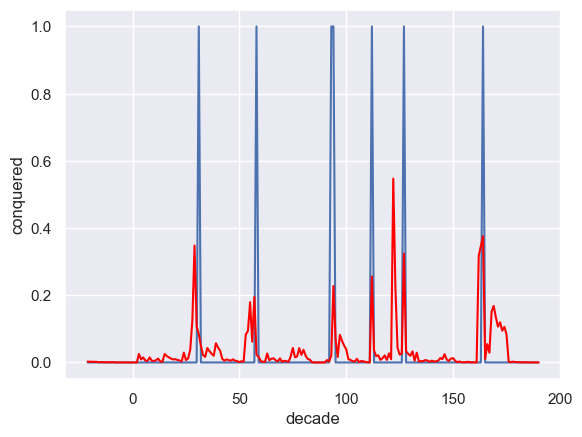

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

df = conqu[['decade','conquered']]
df.loc[:, 'prediction'] = results.predict()

sns.set_theme(style='darkgrid')
sns.lineplot(x='decade', y='conquered', data=df,)
plt.plot(df['decade'], df['prediction'], color='red')
plt.show()

#### （7）-（9）


In [42]:
model_probit = sm.Probit(y,X)
results_probit = model_probit.fit()
print(results_probit.summary())

Optimization terminated successfully.
         Current function value: 0.100350
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:              conquered   No. Observations:                  212
Model:                         Probit   Df Residuals:                      207
Method:                           MLE   Df Model:                            4
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.3083
Time:                        16:13:59   Log-Likelihood:                -21.274
converged:                       True   LL-Null:                       -30.758
Covariance Type:            nonrobust   LLR p-value:                 0.0007977
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8120      0.504     -3.593      0.000      -2.800      -0.824
diff           0.0201      0

In [43]:
mfx_probit = results_probit.get_margeff()
print(mfx_probit.summary())

       Probit Marginal Effects       
Dep. Variable:              conquered
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
diff           0.0011      0.000      2.260      0.024       0.000       0.002
age           -0.0077      0.005     -1.695      0.090      -0.017       0.001
wall          -0.0598      0.028     -2.104      0.035      -0.115      -0.004
drought1       0.1069      0.045      2.350      0.019       0.018       0.196


In [44]:
predicted_classes_probit = results_probit.predict(X) > 0.5
# 计算准确率
accuracy = (predicted_classes_probit == y).mean()

print(f"Accuracy of the model: {accuracy*100:.2f}%")

Accuracy of the model: 96.70%
